# Jupyter Notebooks Advanced Features

<div class="alert bg-primary">PYNQ notebook front end allows interactive coding, output visualizations and documentation using text, equations, images, video and other rich media.</div>
<div class="alert bg-primary">Code, analysis, debug, documentation  and demos are all alive, editable and connected in the Notebooks.</div>


 ## Contents
 
 * [Live, Interactive Cell for Python Coding](#Live,-Interactive-Python-Coding)

    * [Guess that Number](#Guess-that-number-game)

    * [Generate Fibonacci numbers](#Generate-Fibonacci-numbers)
    
    * [Plotting Output](#Plotting-Fibonacci-numbers)   
    
    * [Interactive input and output analysis](#Interactive-input-and-output-analysis) 
    
    * [Interactive debug](#Interactive-debug) 
  

 * [Rich Output Media](#Rich-Output-Media)

    * [Display Images](#Display-Images)

    * [Render SVG images](#Render-SVG-images)
    
    * [Audio Playback](#Audio-Playback)  
    
    * [Add Video](#Add-Video)
    
    * [Add webpages as Interactive Frames](#Add-webpages-as-Interactive-Frames) 
    
    * [Render Latex](#Render-Latex)
    
    
 * [Interactive Plots and Visualization](#Interactive-Plots-and-Visualization)    

    * [Matplotlib](#Matplotlib)


 * [Notebooks are not just for Python](#Notebooks-are-not-just-for-Python)

    * [Access to linux shell commands](#Access-to-linux-shell-commands)

    * [Shell commands in python code](#Shell-commands-in-python-code)

    * [Python variables in shell commands](#Python-variables-in-shell-commands)

    * [Magics](#Magics)     
    
    * [Timing code using magics](#Timing-code-using-magics)       
    
    * [Coding other languages](#Coding-other-languages) 

[Contents](#Contents)

## Live, Interactive Python Coding
### Guess that number game  
Run the cell to play   
Cell can be run by selecting the cell and pressing *Shift+Enter*

In [1]:
import random

the_number = random.randint(0, 10)
guess = -1

name = input('Player what is your name? ')

while guess != the_number:
    guess_text = input('Guess a number between 0 and 10: ')
    guess = int(guess_text)

    if guess < the_number:
        print(f'Sorry {name}, your guess of {guess} was too LOW.\n')
    elif guess > the_number:
        print(f'Sorry {name}, your guess of {guess} was too HIGH.\n')
    else:
        print(f'Excellent work {name}, you won, it was {guess}!\n')

print('Done')


Player what is your name? User
Guess a number between 0 and 10: 5
Sorry User, your guess of 5 was too LOW.

Guess a number between 0 and 10: 8
Sorry User, your guess of 8 was too LOW.

Guess a number between 0 and 10: 9
Sorry User, your guess of 9 was too LOW.

Guess a number between 0 and 10: 10
Excellent work User, you won, it was 10!

Done


[Contents](#Contents)

### Generate Fibonacci numbers   

In [2]:
def generate_fibonacci_list(limit, output=False):
    nums = []
    current, ne_xt = 0, 1

    while current < limit:
        current, ne_xt = ne_xt, ne_xt + current
        nums.append(current)

    if output == True:
        print(f'{len(nums[:-1])} Fibonacci numbers below the number '
              f'{limit} are:\n{nums[:-1]}')

    return nums[:-1]


limit = 1000
fib = generate_fibonacci_list(limit, True)

16 Fibonacci numbers below the number 1000 are:
[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]


[Contents](#Contents)

### Plotting Fibonacci numbers  
Plotting is done using the matplotlib library    

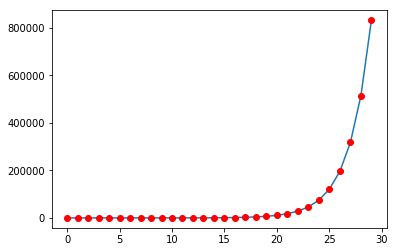

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import *

limit = 1000000
fib = generate_fibonacci_list(limit)
plt.plot(fib) 
plt.plot(range(len(fib)), fib, 'ro')

plt.show()

[Contents](#Contents)

### Interactive input and output analysis
Input and output interaction can be achieved using Ipython widgets   

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import *

def update(limit, print_output):
    i = generate_fibonacci_list(limit, print_output)
    plt.plot(range(len(i)), i)
    plt.plot(range(len(i)), i, 'ro')
    plt.show()

limit=widgets.IntSlider(min=10,max=1000000,step=1,value=10)
interact(update, limit=limit, print_output=False);


[Contents](#Contents)

### Interactive debug
__Uses `set_trace` from the Ipython debugger library__   
__Type 'h' in debug prompt for the debug commands list and 'q' to exit__  

In [ ]:
from IPython.core.debugger import set_trace

def debug_fibonacci_list(limit):
    nums = []
    current, ne_xt = 0, 1

    while current < limit:
        if current > 1000:
            set_trace()
        current, ne_xt = ne_xt, ne_xt + current
        nums.append(current)

    print(f'The fibonacci numbers below the number {limit} are:\n{nums[:-1]}')


debug_fibonacci_list(10000)

[Contents](#Contents)

## Rich Output Media

### Display images
Images can be displayed using combination of HTML, Markdown, PNG, JPG, etc. Image below is displayed in a markdown cell which is rendered at startup 

![](images/pynqz1.jpg)

[Contents](#Contents)

### Render SVG images
`SVG` image is rendered in a code cell using Ipython display library.   

In [4]:
from IPython.display import SVG
SVG(filename='images/python.svg')

[Contents](#Contents)

### Audio Playback
`IPython.display.Audio` lets you play audio directly in the notebook 

In [5]:
import numpy as np
from IPython.display import Audio
framerate = 44100
t = np.linspace(0,5,framerate*5)
data = np.sin(2*np.pi*220*t**2)
Audio(data,rate=framerate)

[Contents](#Contents)

### Add Video
`IPython.display.YouTubeVideo` lets you play Youtube video directly in the notebook. Library support is available to play Vimeo and local videos as well

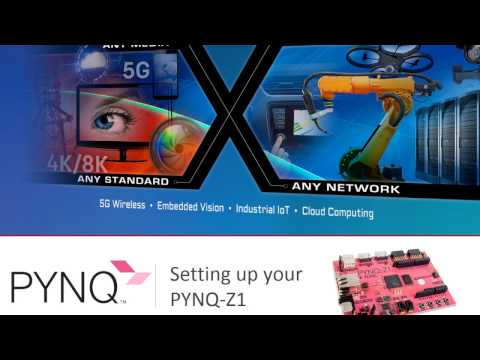

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo('K5okTyjKr5U')

__Video Link with image display__

<a href="https://www.youtube.com/watch?v=K5okTyjKr5U">
<img src="http://img.youtube.com/vi/K5okTyjKr5U/0.jpg" width="400" height="400" align="left"></a>

[Contents](#Contents)

### Add webpages as Interactive Frames
Embed an entire page from another site in an iframe; for example this is the PYNQ documentation page on readthedocs

In [7]:
from IPython.display import IFrame
IFrame('https://pynq.readthedocs.io/en/latest/getting_started.html', 
       width='100%', height=500)

[Contents](#Contents)

### Render Latex
Display of mathematical expressions typeset in LaTeX for documentation.

In [8]:
%%latex 
\begin{align} P(Y=i|x, W,b) = softmax_i(W x + b)= \frac {e^{W_i x + b_i}}
{\sum_j e^{W_j x + b_j}}\end{align}

<IPython.core.display.Latex object>

[Contents](#Contents)

## Interactive Plots and Visualization
Plotting and Visualization can be achieved using various available python libraries such as Matplotlib, Bokeh, Seaborn, etc.   
Below is shown a Iframe of the Matplotlib website. Navigate to 'gallery' and choose a plot to run in the notebook

In [9]:
from IPython.display import IFrame
IFrame('https://matplotlib.org/gallery/index.html', width='100%', height=500)

[Contents](#Contents)

### Matplotlib
Below we run the code available under examples --> Matplotlib API --> Radar_chart in the above webpage  
[Link to Radar chart](https://matplotlib.org/gallery/api/radar_chart.html#sphx-glr-gallery-api-radar-chart-py)

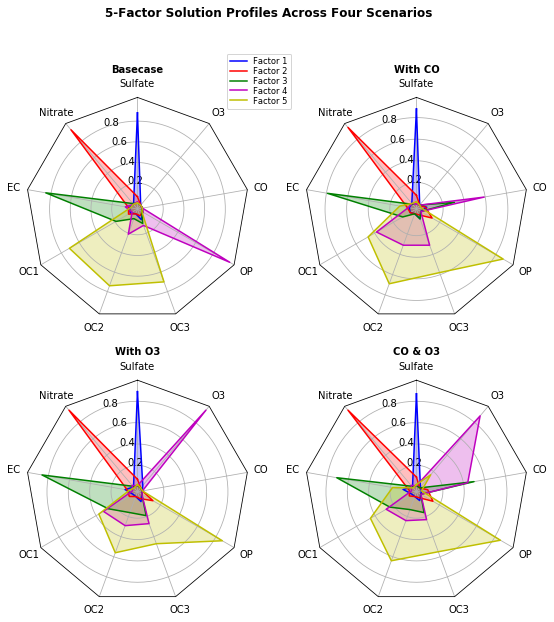

In [10]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    def draw_poly_patch(self):
        # rotate theta such that the first axis is at the top
        verts = unit_poly_verts(theta + np.pi / 2)
        return plt.Polygon(verts, closed=True, edgecolor='k')

    def draw_circle_patch(self):
        # unit circle centered on (0.5, 0.5)
        return plt.Circle((0.5, 0.5), 0.5)

    patch_dict = {'polygon': draw_poly_patch, 'circle': draw_circle_patch}
    if frame not in patch_dict:
        raise ValueError('unknown value for `frame`: %s' % frame)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1
        # define draw_frame method
        draw_patch = patch_dict[frame]

        def __init__(self, *args, **kwargs):
            super(RadarAxes, self).__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, **kwargs):
            """Override fill so that line is closed by default"""
            closed = kwargs.pop('closed', True)
            return super(RadarAxes, self).fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            return self.draw_patch()

        def _gen_axes_spines(self):
            if frame == 'circle':
                return PolarAxes._gen_axes_spines(self)
            # The following is a hack to get the spines (i.e. the axes frame)
            # to draw correctly for a polygon frame.

            # spine_type must be 'left', 'right', 'top', 'bottom', or `circle`.
            spine_type = 'circle'
            verts = unit_poly_verts(theta + np.pi / 2)
            # close off polygon by repeating first vertex
            verts.append(verts[0])
            path = Path(verts)

            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}

    register_projection(RadarAxes)
    return theta


def unit_poly_verts(theta):
    """Return vertices of polygon for subplot axes.

    This polygon is circumscribed by a unit circle centered at (0.5, 0.5)
    """
    x0, y0, r = [0.5] * 3
    verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
    return verts


def example_data():
    # The following data is from the Denver Aerosol Sources and Health study.
    # See  doi:10.1016/j.atmosenv.2008.12.017
    #
    # The data are pollution source profile estimates for five modeled
    # pollution sources (e.g., cars, wood-burning, etc) that emit 7-9 chemical
    # species. The radar charts are experimented with here to see if we can
    # nicely visualize how the modeled source profiles change across four
    # scenarios:
    #  1) No gas-phase species present, just seven particulate counts on
    #     Sulfate
    #     Nitrate
    #     Elemental Carbon (EC)
    #     Organic Carbon fraction 1 (OC)
    #     Organic Carbon fraction 2 (OC2)
    #     Organic Carbon fraction 3 (OC3)
    #     Pyrolized Organic Carbon (OP)
    #  2)Inclusion of gas-phase specie carbon monoxide (CO)
    #  3)Inclusion of gas-phase specie ozone (O3).
    #  4)Inclusion of both gas-phase species is present...
    data = [
        ['Sulfate', 'Nitrate', 'EC', 'OC1', 'OC2', 'OC3', 'OP', 'CO', 'O3'],
        ('Basecase', [
            [0.88, 0.01, 0.03, 0.03, 0.00, 0.06, 0.01, 0.00, 0.00],
            [0.07, 0.95, 0.04, 0.05, 0.00, 0.02, 0.01, 0.00, 0.00],
            [0.01, 0.02, 0.85, 0.19, 0.05, 0.10, 0.00, 0.00, 0.00],
            [0.02, 0.01, 0.07, 0.01, 0.21, 0.12, 0.98, 0.00, 0.00],
            [0.01, 0.01, 0.02, 0.71, 0.74, 0.70, 0.00, 0.00, 0.00]]),
        ('With CO', [
            [0.88, 0.02, 0.02, 0.02, 0.00, 0.05, 0.00, 0.05, 0.00],
            [0.08, 0.94, 0.04, 0.02, 0.00, 0.01, 0.12, 0.04, 0.00],
            [0.01, 0.01, 0.79, 0.10, 0.00, 0.05, 0.00, 0.31, 0.00],
            [0.00, 0.02, 0.03, 0.38, 0.31, 0.31, 0.00, 0.59, 0.00],
            [0.02, 0.02, 0.11, 0.47, 0.69, 0.58, 0.88, 0.00, 0.00]]),
        ('With O3', [
            [0.89, 0.01, 0.07, 0.00, 0.00, 0.05, 0.00, 0.00, 0.03],
            [0.07, 0.95, 0.05, 0.04, 0.00, 0.02, 0.12, 0.00, 0.00],
            [0.01, 0.02, 0.86, 0.27, 0.16, 0.19, 0.00, 0.00, 0.00],
            [0.01, 0.03, 0.00, 0.32, 0.29, 0.27, 0.00, 0.00, 0.95],
            [0.02, 0.00, 0.03, 0.37, 0.56, 0.47, 0.87, 0.00, 0.00]]),
        ('CO & O3', [
            [0.87, 0.01, 0.08, 0.00, 0.00, 0.04, 0.00, 0.00, 0.01],
            [0.09, 0.95, 0.02, 0.03, 0.00, 0.01, 0.13, 0.06, 0.00],
            [0.01, 0.02, 0.71, 0.24, 0.13, 0.16, 0.00, 0.50, 0.00],
            [0.01, 0.03, 0.00, 0.28, 0.24, 0.23, 0.00, 0.44, 0.88],
            [0.02, 0.00, 0.18, 0.45, 0.64, 0.55, 0.86, 0.00, 0.16]])
    ]
    return data


if __name__ == '__main__':
    N = 9
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig, axes = plt.subplots(figsize=(9, 9), nrows=2, ncols=2,
                             subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['b', 'r', 'g', 'm', 'y']
    # Plot the four cases from the example data on separate axes
    for ax, (title, case_data) in zip(axes.flatten(), data):
        ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.25)
        ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    ax = axes[0, 0]
    labels = ('Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5')
    legend = ax.legend(labels, loc=(0.9, .95),
                       labelspacing=0.1, fontsize='small')

    fig.text(0.5, 0.965, '5-Factor Solution Profiles Across Four Scenarios',
             horizontalalignment='center', color='black', weight='bold',
             size='large')

    plt.show()

[Contents](#Contents)

## Notebooks are not just for Python

### Access to linux shell commands   

<div class="alert alert-info">Starting a code cell with a bang character, e.g. `!`, instructs jupyter to treat the code on that line as an OS shell command</div>

#### System Information   

In [11]:
!cat /proc/cpuinfo

processor	: 0
model name	: ARMv7 Processor rev 0 (v7l)
BogoMIPS	: 650.00
Features	: half thumb fastmult vfp edsp neon vfpv3 tls vfpd32 
CPU implementer	: 0x41
CPU architecture: 7
CPU variant	: 0x3
CPU part	: 0xc09
CPU revision	: 0

processor	: 1
model name	: ARMv7 Processor rev 0 (v7l)
BogoMIPS	: 650.00
Features	: half thumb fastmult vfp edsp neon vfpv3 tls vfpd32 
CPU implementer	: 0x41
CPU architecture: 7
CPU variant	: 0x3
CPU part	: 0xc09
CPU revision	: 0

Hardware	: Xilinx Zynq Platform
Revision	: 0003
Serial		: 0000000000000000


#### Verify Linux Version 

In [12]:
!cat /etc/os-release | grep VERSION

VERSION="16.04 LTS (Xenial Xerus)"
VERSION_ID="16.04"


#### CPU speed calculation made by the Linux kernel 

In [13]:
!head -5 /proc/cpuinfo | grep "BogoMIPS"

BogoMIPS	: 650.00


#### Available DRAM

In [14]:
!cat /proc/meminfo | grep 'Mem*'

MemTotal:         507892 kB
MemFree:          101684 kB
MemAvailable:     357020 kB


#### Network connection

In [15]:
!ifconfig

eth0      Link encap:Ethernet  HWaddr 00:18:3e:02:6d:cb  
          inet addr:172.19.73.161  Bcast:172.19.75.255  Mask:255.255.252.0
          inet6 addr: fe80::218:3eff:fe02:6dcb/64 Scope:Link
          UP BROADCAST RUNNING MULTICAST  MTU:1500  Metric:1
          RX packets:22262 errors:0 dropped:0 overruns:0 frame:0
          TX packets:9274 errors:0 dropped:0 overruns:0 carrier:0
          collisions:0 txqueuelen:1000 
          RX bytes:3972408 (3.9 MB)  TX bytes:11258468 (11.2 MB)
          Interrupt:27 Base address:0xb000 

eth0:1    Link encap:Ethernet  HWaddr 00:18:3e:02:6d:cb  
          inet addr:192.168.2.99  Bcast:192.168.2.255  Mask:255.255.255.0
          UP BROADCAST RUNNING MULTICAST  MTU:1500  Metric:1
          Interrupt:27 Base address:0xb000 

lo        Link encap:Local Loopback  
          inet addr:127.0.0.1  Mask:255.0.0.0
          inet6 addr: ::1/128 Scope:Host
          UP LOOPBACK RUNNING  MTU:65536  Metric:1
          RX packets:4558 errors:0 dropped:0 overr

#### Directory Information

In [16]:
!pwd
!echo --------------------------------------------
!ls -C --color 

/home/xilinx/jupyter_notebooks/getting_started
--------------------------------------------
1_jupyter_notebooks.ipynb                    4_base_overlay_iop.ipynb    images
2_python_environment.ipynb                   5_base_overlay_video.ipynb
3_jupyter_notebooks_advanced_features.ipynb  6_base_overlay_audio.ipynb


[Contents](#Contents)

### Shell commands in python code   

In [17]:
files = !ls | head -3

print(files)

['1_jupyter_notebooks.ipynb', '2_python_environment.ipynb', '3_jupyter_notebooks_advanced_features.ipynb']


### Python variables in shell commands   
By enclosing a Python expression within `{}`,  i.e. curly braces, we can substitute it into shell commands

In [18]:
shell_nbs = '*.ipynb | grep "ipynb"'

!ls {shell_nbs}

1_jupyter_notebooks.ipynb
2_python_environment.ipynb
3_jupyter_notebooks_advanced_features.ipynb
4_base_overlay_iop.ipynb
5_base_overlay_video.ipynb
6_base_overlay_audio.ipynb


[Contents](#Contents)

### Magics
> IPython has a set of predefined ‘magic functions’ that you can call with a command line style syntax. There are two kinds of magics, line-oriented and cell-oriented. Line magics are prefixed with the % character and work much like OS command-line calls: they get as an argument the rest of the line, where arguments are passed without parentheses or quotes. Cell magics are prefixed with a double %%, and they are functions that get as an argument not only the rest of the line, but also the lines below it in a separate argument.

To learn more about the IPython magics, simple type %magic in a separate cell   
Below is a list of available magics

In [19]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python

[Contents](#Contents)

### Timing code using magics
The following examples show how to call the built-in` %time` magic   
`%time` times the execution of a single statement   

**Reference: The next two code cells are excerpted from the Python Data Science Handbook by Jake VanderPlas**   
[Link to full handbook](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html)

#### Time the sorting on an unsorted list
A list of 100000 random numbers is sorted and stored in a variable 'L'

In [20]:
import random

L = [random.random() for _ in range(100000)]
%time L.sort()

CPU times: user 550 ms, sys: 0 ns, total: 550 ms
Wall time: 550 ms


#### Time the sorting of a pre-sorted list
The list 'L' which was sorted in previous cell is re-sorted to observe execution time, it is much less as expected  

In [21]:
%time L.sort()

CPU times: user 40 ms, sys: 0 ns, total: 40 ms
Wall time: 45 ms


[Contents](#Contents)

### Coding other languages

If you want to, you can combine code from multiple kernels into one notebook.

Just use IPython Magics with the name of your kernel at the start of each cell that you want to use that Kernel for:

%%bash   
%%HTML   
%%python2   
%%python3   
%%ruby   
%%perl   

In [22]:
%%bash

factorial()
{
    if [ "$1" -gt "1" ]
    then
        i=`expr $1 - 1`
        j=`factorial $i`
        k=`expr $1 \* $j`
        echo $k
    else
        echo 1
    fi
}

input=5
val=$(factorial $input)
echo "Factorial of $input is : "$val

Factorial of 5 is : 120


[Contents](#Contents)